#### Sentiment Analysis Using Bag of Words

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('IMDB Dataset.csv')
df = df[:2000]

In [3]:
import re
import nltk
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
class sentence_cleaning:
    def sent_tokenize(self, dataframe) -> list:
        sentence = [nltk.sent_tokenize(dataframe['review'][ind]) for ind in range(len(dataframe))]  #tokenizes sentence
        return sentence
    
    def stripSentence(self, dataframe) -> list:
        returned_sentence = self.sent_tokenize(dataframe)
        pattern = r'<.*?>|[^\w+\d+]'
        combined_sentence_list = []
        for row in range(len(returned_sentence)):
            combined_sentence = ""
            for col in range(len(returned_sentence[row])):
                combined_sentence += re.sub(pattern, ' ', returned_sentence[row][col])
            combined_sentence_list.append(combined_sentence)
        return combined_sentence_list

    def word_tokenize(self, sent) -> list:
        token_words_list = []
        for row in range(len(sent)):
            token_words = ""
            sent[row] = sent[row].split(' ')
            for col in range(len(sent[row])):
                if sent[row][col] not in stopwords and sent[row][col] != '':
                    token_words += nltk.stem.PorterStemmer().stem(sent[row][col]).lower() + " "
            token_words_list.append(token_words)
        return token_words_list

In [5]:
count_vect = CountVectorizer(ngram_range=(1, 2), lowercase=False)

###### Training

In [6]:
model = sentence_cleaning()
model = model.word_tokenize(model.stripSentence(df))
trans_model = count_vect.fit_transform(model).toarray()

In [7]:
df_train = pd.DataFrame(trans_model, columns = [count_vect.get_feature_names_out()])
df_train

,00,00 feel,00 less,00 sound,00 stay,000,000 000,000 admit,000 alvin,000 corps,...,élan uniqu,être,être peut,être snobist,ís,ís brilliant,ísnt,ísnt entertain,île,île aux
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [9]:
X = trans_model
y = df['sentiment']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40, test_size = 0.3, stratify = y)

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
logreg = LogisticRegression()
logreg.fit(X, y)

LogisticRegression()

###### Validation

In [13]:
modelpred = logreg.predict(X_test)

Accuracy Score: 100.0
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00       298
    positive       1.00      1.00      1.00       302

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600

[[298   0]
 [  0 302]]


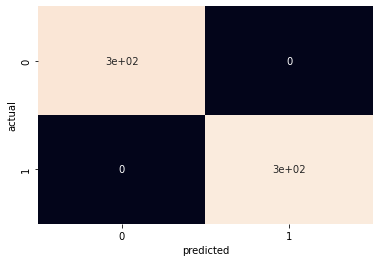

In [21]:
print("Accuracy Score: {}".format(round(accuracy_score(y_test, modelpred)*100, 4)))
print(classification_report(y_test, modelpred))
print(confusion_matrix(y_test, modelpred))
sns.heatmap(confusion_matrix(y_test, modelpred), annot=True, cbar=False)
plt.xlabel('predicted')
plt.ylabel('actual');

###### Testing

In [33]:
test_model = sentence_cleaning().word_tokenize(['This is a good movie'])

In [34]:
trans_test = count_vect.transform(test_model).toarray()

In [35]:
logreg.predict(trans_test)

array(['positive'], dtype=object)